In [1]:
import pandas as pd 

mises_citations_df = pd.read_csv("../data/processed/mises_citations.csv")

In [2]:
mises_citations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7754 non-null   int64  
 1   paper_id                          7754 non-null   int64  
 2   raw                               7754 non-null   object 
 3   context                           7754 non-null   object 
 4   co_cited_count                    7754 non-null   int64  
 5   section_id                        7595 non-null   object 
 6   paragraph_id                      7754 non-null   object 
 7   sentence_id                       7754 non-null   object 
 8   sentence_seq_number               7754 non-null   int64  
 9   reference_seq_number              7754 non-null   int64  
 10  author                            7754 non-null   object 
 11  page                              4791 non-null   float64
 12  year  

In [3]:
mises_citations_df.head()

,Unnamed: 0,paper_id,raw,context,co_cited_count,section_id,paragraph_id,sentence_id,sentence_seq_number,reference_seq_number,...,filename,sentence_count,reference_count,source title,similarity,human_action_chapter_by_ref_page,human_action_chapter_number,human_action_chapter_name,human_action_part_number,human_action_part_name
0,0,834,"(Mises, 1996(Mises, [1949]], p. 1)",The practitioners of methodological holism are...,0,_4dGvzna,_97b4QYq,_dz5ekbM,96,47,...,10.1108.S1529-213420150000019009.pdf.grobid.te...,367,43,Advances in Austrian Economics,100.000000,0,0,Chapter 0: Introduction,0,Part 0: Introduction
1,1,1842,"(Mises 2011, 1)","Interventionism, for its part, ""seeks to retai...",0,_yCU3SGE,_h8VDttU,_5k2NTcp,352,148,...,IS-THE-AUSTRIAN-SCHOOL-VALUEFREE-ON-THE-DEPEND...,458,87,Quarterly Journal of Austrian Economics,100.000000,0,0,Chapter 0: Introduction,0,Part 0: Introduction
2,2,1197,Mises (1944: 1-19),"Indeed, Mises (1944: 1-19) explicitly cites th...",0,_ThHCvKg,_xKvBxdX,_EndqMMB,3399,1633,...,10.4324.9781315754581.pdf.grobid.tei.xml,3855,337,Knowledge Management and Organizational Learning,76.923077,0,0,Chapter 0: Introduction,0,Part 0: Introduction
3,3,1197,"Mises, 1944: 1-19)","(Lippmann, 1938(Lippmann, /1943: 263;: 263; em...",3,_W7w3J4K,_FXcX2C6,_mpaD3bx,3456,1675,...,10.4324.9781315754581.pdf.grobid.tei.xml,3855,337,Knowledge Management and Organizational Learning,76.923077,0,0,Chapter 0: Introduction,0,Part 0: Introduction
4,4,1920,"Mises's (1962, 1)","Indeed, the logical structure of the human min...",0,_JRV4vR4,_K4EEPwH,_kzagVzN,367,282,...,Ludwig-von-Mises-on-the-epistemological-founda...,533,66,Review of Austrian Economics,100.000000,0,0,Chapter 0: Introduction,0,Part 0: Introduction


In [4]:
pd.set_option("display.max_colwidth", None)


filtered_df = mises_citations_df[
    mises_citations_df["context"].str.contains("inflation", case=False, na=False)
]

filtered_df = mises_citations_df[
    mises_citations_df["context"].str.contains("cautionary", case=False, na=False)
]


print(filtered_df.shape[0])

print(filtered_df['human_action_chapter_number'].value_counts())

filtered_df = filtered_df[
    filtered_df["human_action_chapter_number"] == "WHOLE"
]

#filtered_df[["paper_id", "raw", "human_action_chapter_number", "context"]].head(100)

filtered_df.head(100)



1
human_action_chapter_number
WHOLE    1
Name: count, dtype: int64


,Unnamed: 0,paper_id,raw,context,co_cited_count,section_id,paragraph_id,sentence_id,sentence_seq_number,reference_seq_number,...,filename,sentence_count,reference_count,source title,similarity,human_action_chapter_by_ref_page,human_action_chapter_number,human_action_chapter_name,human_action_part_number,human_action_part_name
6951,6951,2002,Mises (1949),"Austrian School of Thought The Austrian School, particularly through the works of Hayek (1960) and Mises (1949), offers a dynamic and cautionary interpretation of inflation.",1,_JXcmnw9,_Yz8c6Xz,_Sbnnbxe,85,32,...,Money-Supply-Inflation-and-Economic-Growth-The-Case-of-the-Eurozone-19902022_2025_Springer.pdf.grobid.tei.xml,438,58,Computational Economics,98.780488,WHOLE,WHOLE,WHOLE,WHOLE,WHOLE


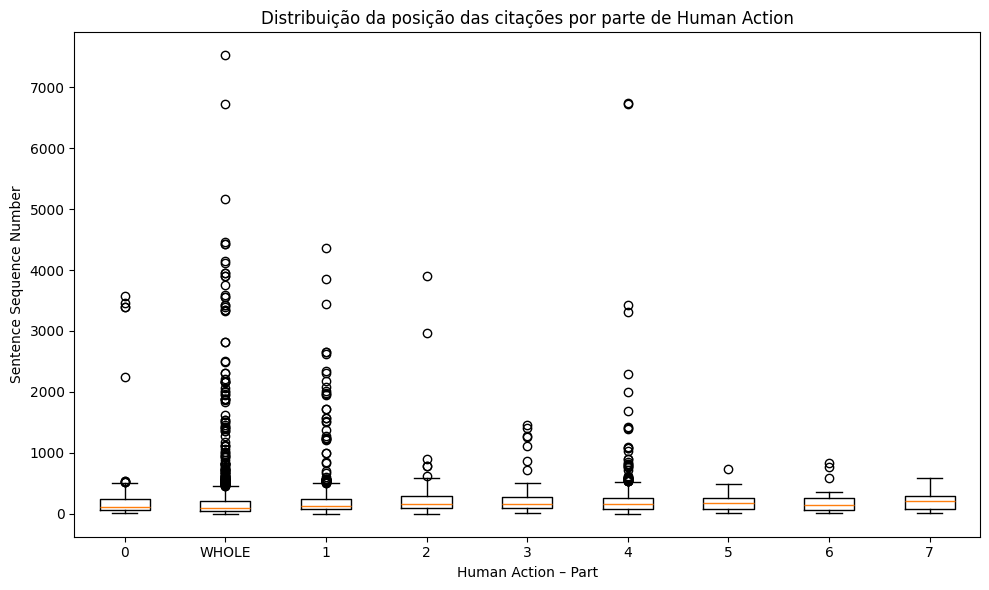

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove linhas sem informação relevante
plot_df = (
    mises_citations_df
        .dropna(subset=["human_action_part_number", "sentence_seq_number"])
        .copy()
)

# Cria coluna auxiliar para ordenação
plot_df["part_order"] = plot_df["human_action_part_number"].apply(
    lambda x: 0 if x == "WHOLE" else int(x)
)

# Ordena: WHOLE primeiro, depois Part 1, 2, 3...
plot_df = plot_df.sort_values("part_order")

# Agrupa dados
groups = [
    group["sentence_seq_number"].values
    for _, group in plot_df.groupby("human_action_part_number", sort=False)
]

labels = [
    str(part)
    for part in plot_df.groupby("human_action_part_number", sort=False).groups.keys()
]

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(groups, labels=labels, showfliers=True)
plt.xlabel("Human Action – Part")
plt.ylabel("Sentence Sequence Number")
plt.title("Distribuição da posição das citações por parte de Human Action")
plt.tight_layout()
plt.show()


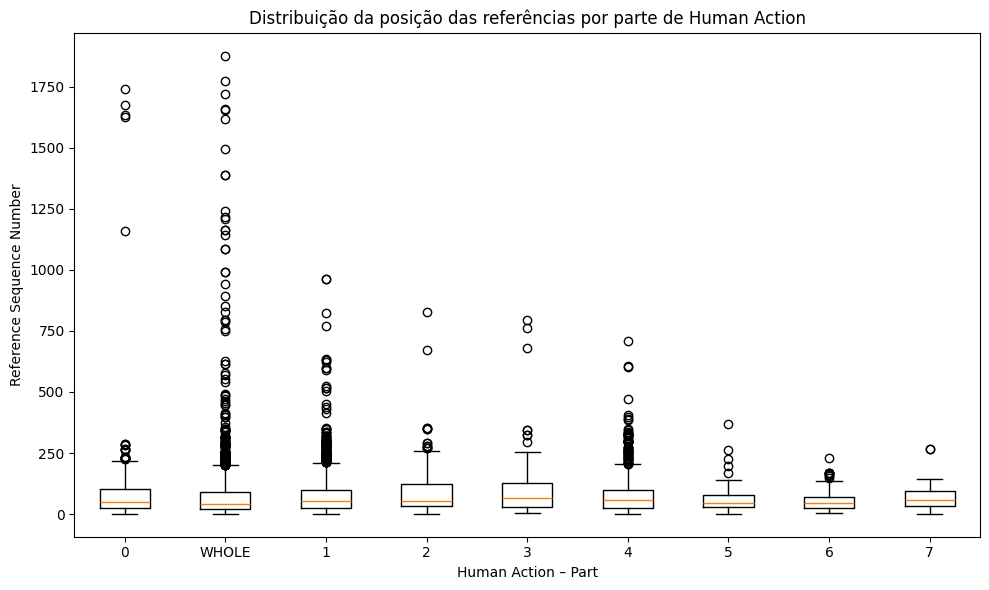

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove linhas sem informação relevante
plot_df = (
    mises_citations_df
        .dropna(subset=["human_action_part_number", "reference_seq_number"])
        .copy()
)

# Coluna auxiliar para ordenação (WHOLE primeiro)
plot_df["part_order"] = plot_df["human_action_part_number"].apply(
    lambda x: 0 if x == "WHOLE" else int(x)
)

# Ordena partes
plot_df = plot_df.sort_values("part_order")

# Prepara dados para o boxplot
groups = [
    group["reference_seq_number"].values
    for _, group in plot_df.groupby("human_action_part_number", sort=False)
]

labels = [
    str(part)
    for part in plot_df.groupby("human_action_part_number", sort=False).groups.keys()
]

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(groups, labels=labels, showfliers=True)
plt.xlabel("Human Action – Part")
plt.ylabel("Reference Sequence Number")
plt.title("Distribuição da posição das referências por parte de Human Action")
plt.tight_layout()
plt.show()


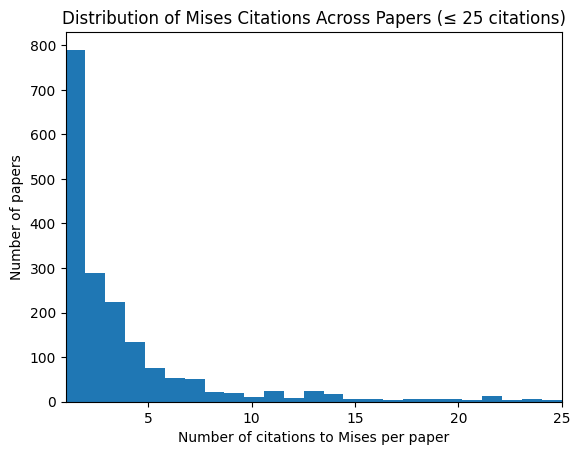

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Conta quantas vezes cada paper cita Mises
citations_per_paper = (
    mises_citations_df
        .groupby("paper_id")
        .size()
        .rename("n_citations")
        .reset_index()
)

# Limita a 25 citações
citations_per_paper = citations_per_paper[
    citations_per_paper["n_citations"] <= 25
]

# Histograma
plt.figure()
plt.hist(citations_per_paper["n_citations"], bins=25)
plt.xlabel("Number of citations to Mises per paper")
plt.ylabel("Number of papers")
plt.title("Distribution of Mises Citations Across Papers (≤ 25 citations)")
plt.xlim(1, 25)
plt.show()


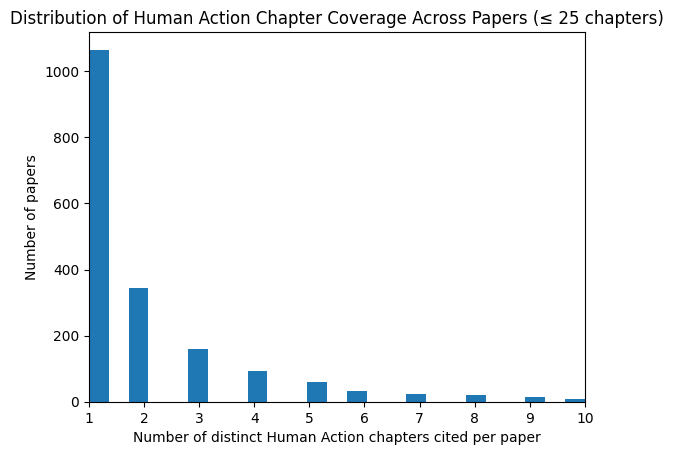

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Conta quantos capítulos distintos de Human Action cada paper cita
chapters_per_paper = (
    mises_citations_df
        .dropna(subset=["human_action_chapter_number"])
        .groupby("paper_id")["human_action_chapter_number"]
        .nunique()
        .rename("n_distinct_chapters")
        .reset_index()
)

# Limita a 25 capítulos
chapters_per_paper = chapters_per_paper[
    chapters_per_paper["n_distinct_chapters"] <= 10
]

# Histograma
plt.figure()
plt.hist(chapters_per_paper["n_distinct_chapters"], bins=25)
plt.xlabel("Number of distinct Human Action chapters cited per paper")
plt.ylabel("Number of papers")
plt.title("Distribution of Human Action Chapter Coverage Across Papers (≤ 25 chapters)")
plt.xlim(1, 10)
plt.show()


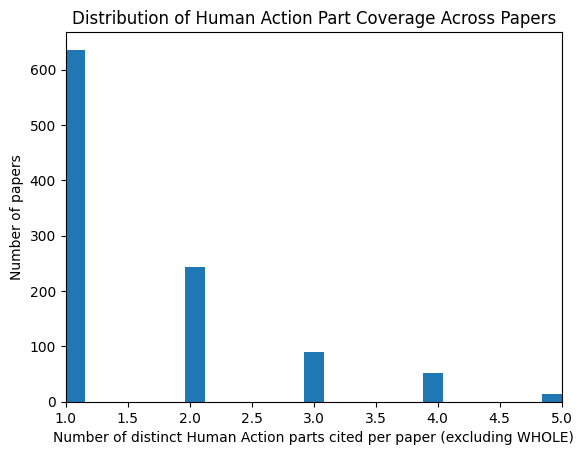

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# Conta quantas partes distintas (≠ WHOLE) cada paper cita
# --------------------------------------------------
parts_per_paper = (
    mises_citations_df[
        mises_citations_df["human_action_part_number"] != "WHOLE"
    ]
        .dropna(subset=["human_action_part_number"])
        .groupby("paper_id")["human_action_part_number"]
        .nunique()
        .rename("n_distinct_parts")
        .reset_index()
)

# --------------------------------------------------
# Limita a 5 partes (segurança)
# --------------------------------------------------
parts_per_paper = parts_per_paper[
    parts_per_paper["n_distinct_parts"] <= 5
]

# --------------------------------------------------
# Histograma
# --------------------------------------------------
plt.figure()
plt.hist(parts_per_paper["n_distinct_parts"], bins=25)
plt.xlabel("Number of distinct Human Action parts cited per paper (excluding WHOLE)")
plt.ylabel("Number of papers")
plt.title("Distribution of Human Action Part Coverage Across Papers")
plt.xlim(1, 5)
plt.show()


In [10]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# --------------------------------------------------
# Parâmetros
# --------------------------------------------------
WHOLE_LABEL = "WHOLE"
K = 20
MIN_SIZE = 2
MAX_SIZE = 2

# --------------------------------------------------
# 1️⃣ Partes distintas por paper
# --------------------------------------------------
parts_by_paper = (
    mises_citations_df
        .dropna(subset=["human_action_part_number"])
        .groupby("paper_id")["human_action_part_number"]
        .apply(lambda x: set(x))
)

# --------------------------------------------------
# 2️⃣ Classificação dos papers (mutuamente exclusiva)
# --------------------------------------------------
cite_whole = parts_by_paper[
    parts_by_paper.apply(lambda parts: parts == {WHOLE_LABEL})
]

cite_whole_and_part = parts_by_paper[
    parts_by_paper.apply(
        lambda parts: WHOLE_LABEL in parts and len(parts) > 1
    )
]

cite_only_part = parts_by_paper[
    parts_by_paper.apply(
        lambda parts: WHOLE_LABEL not in parts
    )
]

# Sanity check
assert (
    len(cite_whole)
    + len(cite_whole_and_part)
    + len(cite_only_part)
    == len(parts_by_paper)
)

# --------------------------------------------------
# Função: support e lift para um subconjunto
# --------------------------------------------------
def compute_support_lift(parts_series, label):
    N_PAPERS = len(parts_series)

    if N_PAPERS == 0:
        return {}

    # Support individual
    single_counter = Counter()
    for parts in parts_series:
        for p in parts:
            single_counter[p] += 1

    single_support = {
        p: count / N_PAPERS
        for p, count in single_counter.items()
    }

    rows = {}

    for size in range(MIN_SIZE, MAX_SIZE + 1):
        combo_counter = Counter()

        for parts in parts_series:
            if len(parts) < size:
                continue
            for combo in combinations(sorted(parts), size):
                combo_counter[combo] += 1

        for combo, freq in combo_counter.most_common(K):
            support = freq / N_PAPERS
            denom = np.prod([single_support[p] for p in combo])
            lift = support / denom if denom > 0 else np.nan

            rows[(combo, label)] = {
                "regime": label,
                "combination_size": size,
                "part_combination": combo,
                "frequency": freq,
                "support": support,
                "lift": lift
            }

    return rows

# --------------------------------------------------
# 3️⃣ Cálculo para os três regimes
# --------------------------------------------------
rows = {}
rows.update(compute_support_lift(cite_whole, "cite_whole"))
rows.update(compute_support_lift(cite_whole_and_part, "cite_whole_and_part"))
rows.update(compute_support_lift(cite_only_part, "cite_only_part"))

# --------------------------------------------------
# 4️⃣ DataFrame final
# --------------------------------------------------
top_combinations_df = (
    pd.DataFrame(rows.values())
      .sort_values(["regime", "lift"], ascending=[True, False])
      .reset_index(drop=True)
)

# --------------------------------------------------
# 5️⃣ Resultado
# --------------------------------------------------

top_combinations_df = top_combinations_df.sort_values(by='lift', ascending=False)

top_combinations_df.head(1000)


,regime,combination_size,part_combination,frequency,support,lift
0,cite_only_part,2,"(5, 6)",6,0.013793,2.965909
1,cite_only_part,2,"(2, 3)",15,0.034483,2.421150
20,cite_whole_and_part,2,"(2, 3)",26,0.042623,1.943151
2,cite_only_part,2,"(0, 2)",14,0.032184,1.942584
3,cite_only_part,2,"(2, 6)",9,0.020690,1.617769
21,cite_whole_and_part,2,"(0, 2)",23,0.037705,1.438679
4,cite_only_part,2,"(3, 6)",7,0.016092,1.412338
22,cite_whole_and_part,2,"(0, 3)",16,0.026230,1.377753
5,cite_only_part,2,"(2, 4)",36,0.082759,1.349418
23,cite_whole_and_part,2,"(1, 2)",81,0.132787,1.291225


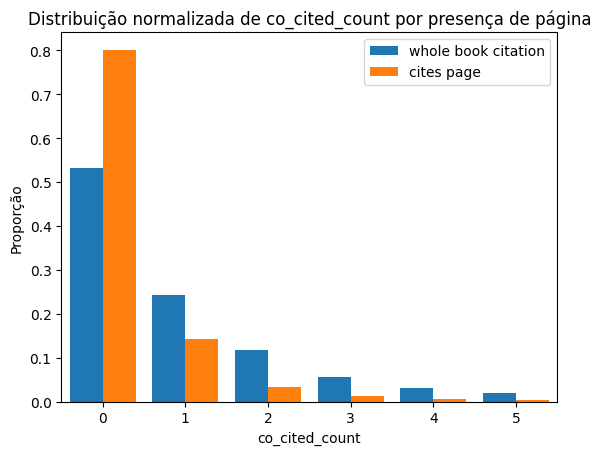

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Valores possíveis
x_vals = np.arange(6)  # 0,1,2,3,4,5
width = 0.4

# Contagens
counts_no_page = (
    mises_citations_df[mises_citations_df["page"].isna()]["co_cited_count"]
    .value_counts()
    .reindex(x_vals, fill_value=0)
    .sort_index()
)

counts_with_page = (
    mises_citations_df[mises_citations_df["page"].notna()]["co_cited_count"]
    .value_counts()
    .reindex(x_vals, fill_value=0)
    .sort_index()
)

# 🔴 Normalização (cada regime soma 1)
counts_no_page_norm = counts_no_page / counts_no_page.sum()
counts_with_page_norm = counts_with_page / counts_with_page.sum()

# Plot único
plt.figure()
plt.bar(x_vals - width/2, counts_no_page_norm.values, width, label="whole book citation")
plt.bar(x_vals + width/2, counts_with_page_norm.values, width, label="cites page")

plt.xlim(-0.5, 5.5)
plt.xticks(x_vals)
plt.xlabel("co_cited_count")
plt.ylabel("Proporção")
plt.title("Distribuição normalizada de co_cited_count por presença de página")
plt.legend()
plt.show()



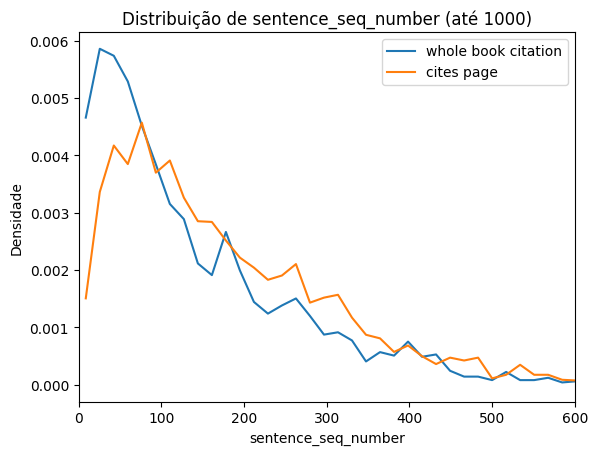

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Filtra os dois regimes
seq_no_page = mises_citations_df[mises_citations_df["page"].isna()]["sentence_seq_number"].dropna()
seq_with_page = mises_citations_df[mises_citations_df["page"].notna()]["sentence_seq_number"].dropna()

# Limita até 1000
seq_no_page = seq_no_page[seq_no_page <= 1000]
seq_with_page = seq_with_page[seq_with_page <= 1000]

# Bins comuns
bins = np.linspace(0, 1000, 60)

# Calcula histogramas normalizados
hist_no_page, _ = np.histogram(seq_no_page, bins=bins, density=True)
hist_with_page, _ = np.histogram(seq_with_page, bins=bins, density=True)

# Centros dos bins
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot como linhas
plt.figure()
plt.plot(bin_centers, hist_no_page, label="whole book citation")
plt.plot(bin_centers, hist_with_page, label="cites page")

plt.xlim(0, 600)
plt.xlabel("sentence_seq_number")
plt.ylabel("Densidade")
plt.title("Distribuição de sentence_seq_number (até 1000)")
plt.legend()
plt.show()


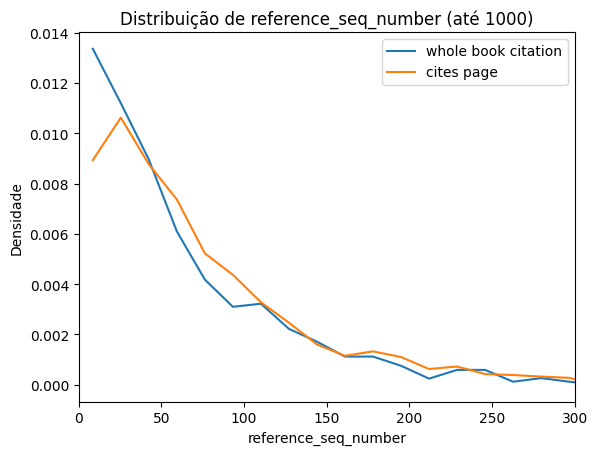

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Filtra os dois regimes
seq_no_page = mises_citations_df[mises_citations_df["page"].isna()]["reference_seq_number"].dropna()
seq_with_page = mises_citations_df[mises_citations_df["page"].notna()]["reference_seq_number"].dropna()

# Limita até 1000
seq_no_page = seq_no_page[seq_no_page < 300]
seq_with_page = seq_with_page[seq_with_page <= 300]

# Bins comuns
bins = np.linspace(0, 1000, 60)

# Calcula histogramas normalizados
hist_no_page, _ = np.histogram(seq_no_page, bins=bins, density=True)
hist_with_page, _ = np.histogram(seq_with_page, bins=bins, density=True)

# Centros dos bins
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot como linhas
plt.figure()
plt.plot(bin_centers, hist_no_page, label="whole book citation")
plt.plot(bin_centers, hist_with_page, label="cites page")

plt.xlim(0, 300)
plt.xlabel("reference_seq_number")
plt.ylabel("Densidade")
plt.title("Distribuição de reference_seq_number (até 1000)")
plt.legend()
plt.show()


C:\Users\pedro\AppData\Local\Temp\ipykernel_16776\3249870257.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("bin")


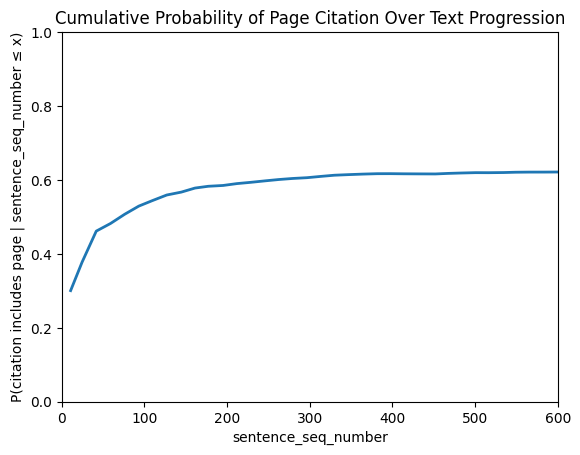

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Copia e limpa
df = mises_citations_df.copy()

# Define se tem page (tratando string vazia)
df["page_filled"] = (
    df["page"].notna() &
    (df["page"].astype(str).str.strip() != "")
)

# Limita sentence_seq_number
df = df[df["sentence_seq_number"].notna()]
df = df[df["sentence_seq_number"] <= 1000]

# Ordena por posição no texto
df = df.sort_values("sentence_seq_number")

# Cálculos acumulados
df["cum_total"] = 1
df["cum_with_page"] = df["page_filled"].astype(int)

df["cum_total"] = df["cum_total"].cumsum()
df["cum_with_page"] = df["cum_with_page"].cumsum()

# Probabilidade acumulada
df["prob_page_cumulative"] = df["cum_with_page"] / df["cum_total"]

# Para suavizar o gráfico, agregamos em bins
bins = np.linspace(0, 1000, 60)
df["bin"] = pd.cut(df["sentence_seq_number"], bins=bins)

plot_df = (
    df.groupby("bin")
      .agg(
          sentence_seq_mean=("sentence_seq_number", "mean"),
          prob_page=("prob_page_cumulative", "mean")
      )
      .dropna()
)

# Plot
plt.figure()
plt.plot(
    plot_df["sentence_seq_mean"],
    plot_df["prob_page"],
    linewidth=2
)

plt.xlim(0, 600)
plt.ylim(0, 1)
plt.xlabel("sentence_seq_number")
plt.ylabel("P(citation includes page | sentence_seq_number ≤ x)")
plt.title("Cumulative Probability of Page Citation Over Text Progression")
plt.show()


C:\Users\pedro\AppData\Local\Temp\ipykernel_16776\2988563533.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("bin")


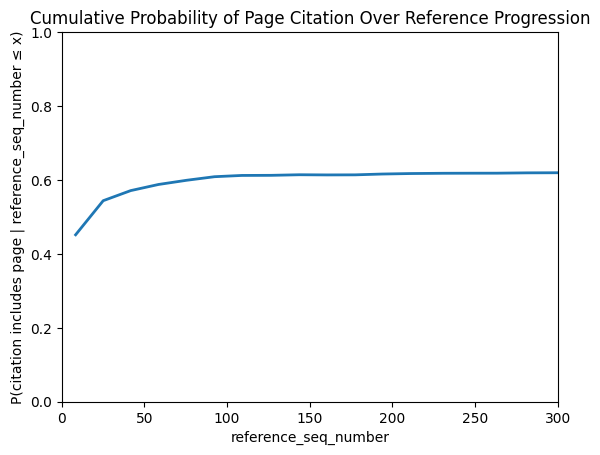

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Copia e limpa
df = mises_citations_df.copy()

# Define se tem page (tratando string vazia)
df["page_filled"] = (
    df["page"].notna() &
    (df["page"].astype(str).str.strip() != "")
)

# Limita sentence_seq_number
df = df[df["reference_seq_number"].notna()]
df = df[df["reference_seq_number"] <= 1000]

# Ordena por posição no texto
df = df.sort_values("reference_seq_number")

# Cálculos acumulados
df["cum_total"] = 1
df["cum_with_page"] = df["page_filled"].astype(int)

df["cum_total"] = df["cum_total"].cumsum()
df["cum_with_page"] = df["cum_with_page"].cumsum()

# Probabilidade acumulada
df["prob_page_cumulative"] = df["cum_with_page"] / df["cum_total"]

# Para suavizar o gráfico, agregamos em bins
bins = np.linspace(0, 1000, 60)
df["bin"] = pd.cut(df["reference_seq_number"], bins=bins)

plot_df = (
    df.groupby("bin")
      .agg(
          reference_seq_mean=("reference_seq_number", "mean"),
          prob_page=("prob_page_cumulative", "mean")
      )
      .dropna()
)

# Plot
plt.figure()
plt.plot(
    plot_df["reference_seq_mean"],
    plot_df["prob_page"],
    linewidth=2
)

plt.xlim(0, 300)
plt.ylim(0, 1)
plt.xlabel("reference_seq_number")
plt.ylabel("P(citation includes page | reference_seq_number ≤ x)")
plt.title("Cumulative Probability of Page Citation Over Reference Progression")
plt.show()


C:\Users\pedro\AppData\Local\Temp\ipykernel_16776\3491828272.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("bin")


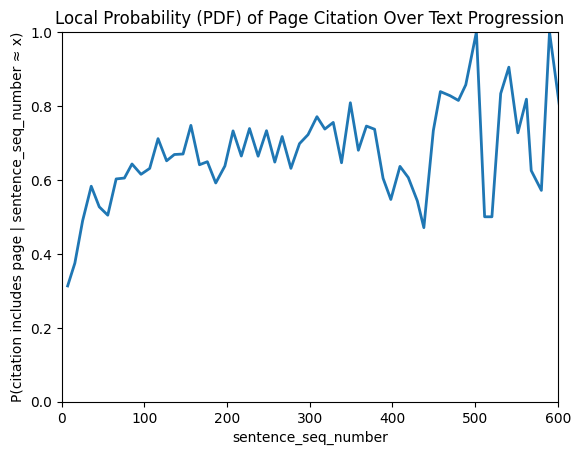

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Copia e limpa
df = mises_citations_df.copy()

# Define se tem page (tratando string vazia)
df["page_filled"] = (
    df["page"].notna() &
    (df["page"].astype(str).str.strip() != "")
)

# Limita sentence_seq_number
df = df[df["sentence_seq_number"].notna()]
df = df[df["sentence_seq_number"] <= 1000]

# Define bins
bins = np.linspace(0, 1000, 100)
df["bin"] = pd.cut(df["sentence_seq_number"], bins=bins)

# Probabilidade local (PDF empírica)
plot_df = (
    df.groupby("bin")
      .agg(
          sentence_seq_mean=("sentence_seq_number", "mean"),
          prob_page=("page_filled", "mean"),  # <-- PDF
          count=("page_filled", "size")
      )
      .dropna()
)

# Plot
plt.figure()
plt.plot(
    plot_df["sentence_seq_mean"],
    plot_df["prob_page"],
    linewidth=2
)

plt.xlim(0, 600)
plt.ylim(0, 1)
plt.xlabel("sentence_seq_number")
plt.ylabel("P(citation includes page | sentence_seq_number ≈ x)")
plt.title("Local Probability (PDF) of Page Citation Over Text Progression")
plt.show()


In [17]:
import pandas as pd

# Garante que page vazia ("") também seja tratada como NA
page_filled = (
    mises_citations_df['page'].notna() &
    (mises_citations_df['page'].astype(str).str.strip() != "")
)

stats = (
    mises_citations_df
        .assign(page_filled=page_filled)
        .groupby('page_filled')
        .agg(
            mean_sentence_seq_number=('sentence_seq_number', 'mean'),
            std_sentence_seq_number=('sentence_seq_number', 'std'),
            count=('sentence_seq_number', 'size')
        )
        .reset_index()
        .assign(
            page_status=lambda df: df['page_filled'].map({
                True: 'With page',
                False: 'Without page'
            })
        )
        .drop(columns='page_filled')
)

stats


,mean_sentence_seq_number,std_sentence_seq_number,count,page_status
0,194.466757,426.201110,2963,Without page
1,199.027760,286.030606,4791,With page


In [18]:
import pandas as pd

K = 50  # ajuste aqui o limiar mínimo de referências

# Garante que page vazia ("") também seja tratada como NA
page_filled = (
    mises_citations_df['page'].notna() &
    (mises_citations_df['page'].astype(str).str.strip() != "")
)

result = (
    mises_citations_df
        .assign(page_filled=page_filled)
        .groupby('source title')
        .agg(
            total_refs=('page_filled', 'size'),
            rows_with_page=('page_filled', 'sum'),
            mean_sentence_seq_number=('sentence_seq_number', 'mean'),
            std_sentence_seq_number=('sentence_seq_number', 'std')
        )
        .query("total_refs > @K")
        .assign(
            perc_with_page=lambda df: 100 * df['rows_with_page'] / df['total_refs']
        )
        .reset_index()
)

# 🔹 Reordena colunas: métricas principais primeiro, sentence_seq_number no final
result = result[
    [
        'source title',
        'total_refs',
        'rows_with_page',
        'perc_with_page',
        'mean_sentence_seq_number',
        'std_sentence_seq_number'
    ]
].sort_values('perc_with_page', ascending=False)

result.head(50)


,source title,total_refs,rows_with_page,perc_with_page,mean_sentence_seq_number,std_sentence_seq_number
13,Social Epistemology,78,75,96.153846,211.141026,94.684812
5,Journal of Economic Methodology,125,110,88.000000,213.776000,134.077305
9,Research in the History of Economic Thought and Methodology,65,55,84.615385,163.507692,92.630672
7,Journal of the History of Economic Thought,68,56,82.352941,190.117647,107.861787
11,Review of Political Economy,104,85,81.730769,176.278846,149.488673
15,Zagadnienia Filozoficzne w Nauce,67,54,80.597015,174.880597,106.410657
2,Constitutional Political Economy,61,49,80.327869,173.409836,127.128069
8,Quarterly Journal of Austrian Economics,812,586,72.167488,142.257389,138.688445
1,Cambridge Journal of Economics,82,57,69.512195,127.085366,81.398305
10,Review of Austrian Economics,3530,2400,67.988669,224.679887,409.310458


In [19]:
mises_citations_df['human_action_part_name'].unique()

array(['Part 0: Introduction', 'Part 1: Human Action',
       'Part 2: Action Within the Framework of Society',
       'Part 3: Economic Calculation', 'Part 4: Catallatics',
       'Part 5: Social Cooperation without a Market',
       'Part 6: The Hampered Market Economy',
       'Part 7: The Place of Economics in Society', 'WHOLE'], dtype=object)

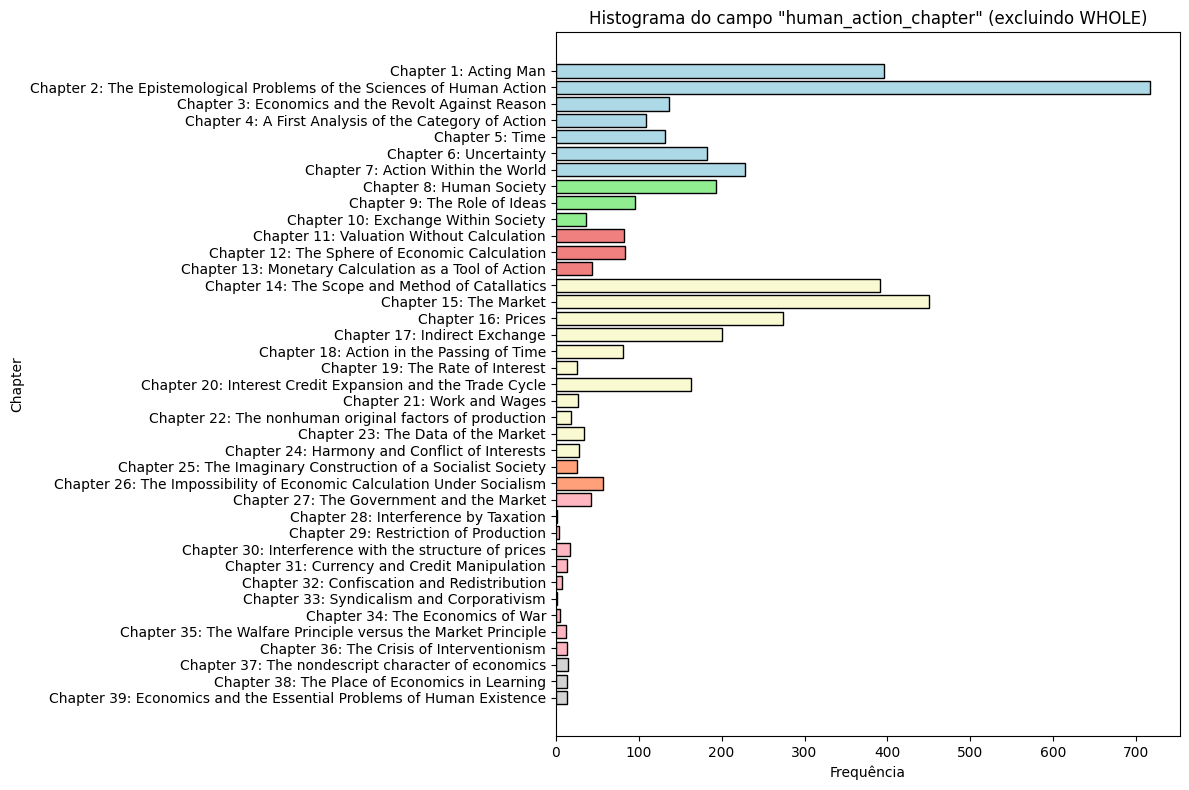

In [20]:
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1️⃣ Filtragem: remove "not found" e "WHOLE"
# --------------------------------------------------
filtered_df = mises_citations_df[
    (mises_citations_df['human_action_chapter_name'] != 'not found') &
    (mises_citations_df['human_action_part_number'] != 'WHOLE')
].copy()

# --------------------------------------------------
# 2️⃣ Converte human_action_part_number para inteiro
# --------------------------------------------------
filtered_df['human_action_part_number'] = (
    filtered_df['human_action_part_number']
    .astype(int)
)

filtered_df['human_action_chapter_number'] = (
    filtered_df['human_action_chapter_number']
    .astype(int)
)

# --------------------------------------------------
# 3️⃣ Mapeamento de cores por part
# --------------------------------------------------
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}

filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# --------------------------------------------------
# 4️⃣ Contagem por capítulo
# --------------------------------------------------
chapter_counts_sorted = (
    filtered_df
        .groupby(
            [
                'human_action_chapter_name',
                'human_action_chapter_number',
                'human_action_part_number',
                'bar_color'
            ]
        )
        .size()
        .reset_index(name='counts')
        .sort_values(by='human_action_chapter_number', ascending=False)
)

# --------------------------------------------------
# 5️⃣ Plot
# --------------------------------------------------
plt.figure(figsize=(12, 8))
plt.barh(
    chapter_counts_sorted['human_action_chapter_name'],
    chapter_counts_sorted['counts'],
    color=chapter_counts_sorted['bar_color'],
    edgecolor='black'
)

plt.title('Histograma do campo "human_action_chapter" (excluindo WHOLE)')
plt.xlabel('Frequência')
plt.ylabel('Chapter')

plt.tight_layout()
plt.savefig('../reports/human_action_chapters.png')
plt.show()


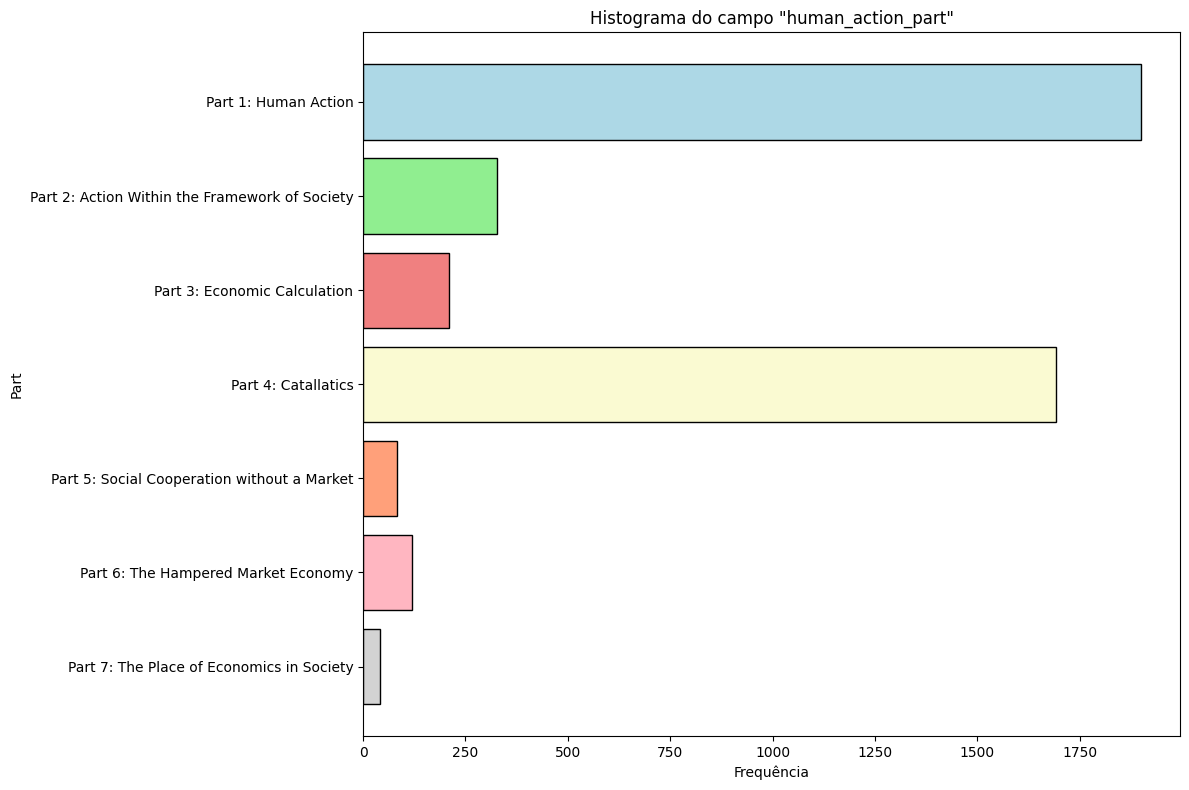

In [21]:
import matplotlib.pyplot as plt

# Simulating the DataFrame (example)
# data = {'human_action_chapter': ['Chapter 3', 'Chapter 1', 'not found', 'Chapter 2', 'Chapter 11', 'Chapter 1', 'not found']}
# mises_refs_df = pd.DataFrame(data)

# --------------------------------------------------
# 1️⃣ Filtragem: remove "not found" e "WHOLE"
# --------------------------------------------------
filtered_df = mises_citations_df[
    (mises_citations_df['human_action_chapter_name'] != 'not found') &
    (mises_citations_df['human_action_part_number'] != 'WHOLE')
].copy()

# --------------------------------------------------
# 2️⃣ Converte human_action_part_number para inteiro
# --------------------------------------------------
filtered_df['human_action_part_number'] = (
    filtered_df['human_action_part_number']
    .astype(int)
)

filtered_df['human_action_chapter_number'] = (
    filtered_df['human_action_chapter_number']
    .astype(int)
)

# Color mapping based on parts
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}


# Assign colors to each chapter based on its part
filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# Group by chapter and count occurrences, then sort by chapter number
chapter_counts_sorted = (
    filtered_df.groupby(['human_action_part_name', 'human_action_part_number', 'bar_color']).size().reset_index(name='counts')
    .sort_values(by='human_action_part_number', ascending=False)
)

# Plot the histogram with adjusted vertical space
plt.figure(figsize=(12, 8))  # Increased height for more vertical space
plt.barh(chapter_counts_sorted['human_action_part_name'], chapter_counts_sorted['counts'], 
         color=chapter_counts_sorted['bar_color'], edgecolor='black')

plt.title('Histograma do campo "human_action_part"')
plt.xlabel('Frequência')
plt.ylabel('Part')

# Adjust layout for better label display
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../reports/human_action_parts.png')

# Show the plot
plt.show()


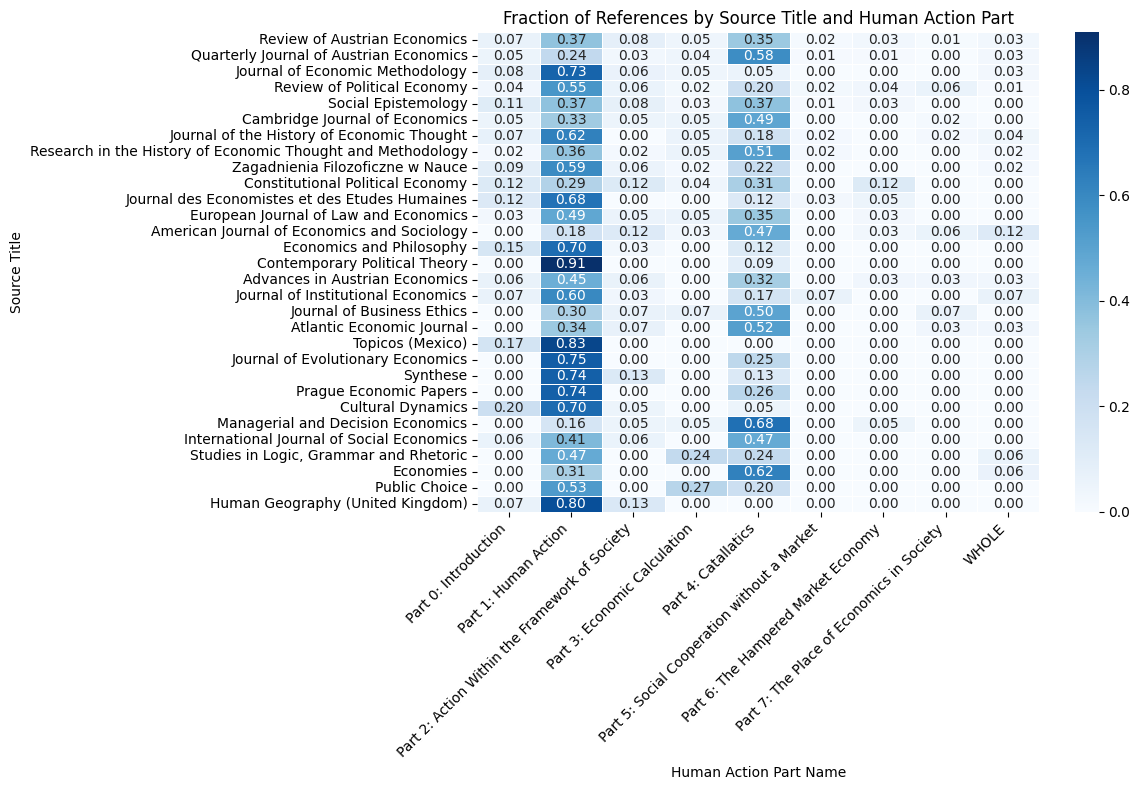

Heatmap saved to ../reports/mises_heatmap.png


In [22]:
'''
prompt:
Write python code that works with mises_refs_df.
Take the top 15 'Source title' and build a heat map showing the fraction of references (rows) that fall on each 'human_action_part_name'.

Sort 'Source title' from the most to the least frequent.

'''

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../reports/"
os.makedirs(output_dir, exist_ok=True)

# Get top 15 'Source title' considering only rows with non-NA page
top_sources = (
    mises_citations_df.loc[mises_citations_df['page'].notna(), 'source title']
    .value_counts()
    .head(30)
    .index
)

filtered_df = mises_citations_df[
    mises_citations_df['source title'].isin(top_sources) &
    mises_citations_df['page'].notna()
]

# Create a crosstab (count table)
count_table = pd.crosstab(
    filtered_df['source title'],
    filtered_df['human_action_part_name'],
    normalize='index'  # Normalize by row to get fractions
)

# Reorder rows from most to least frequent
ordered_index = (
    filtered_df['source title']
    .value_counts()
    .loc[top_sources]
    .index
)

# Reorder the count_table accordingly
count_table = count_table.loc[ordered_index]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(count_table, cmap="Blues", linewidths=0.5, annot=True, fmt=".2f")

plt.title("Fraction of References by Source Title and Human Action Part")
plt.xlabel("Human Action Part Name")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
output_path = os.path.join(output_dir, "mises_heatmap.png")
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


C:\Users\pedro\AppData\Local\Temp\ipykernel_16776\3692478591.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(


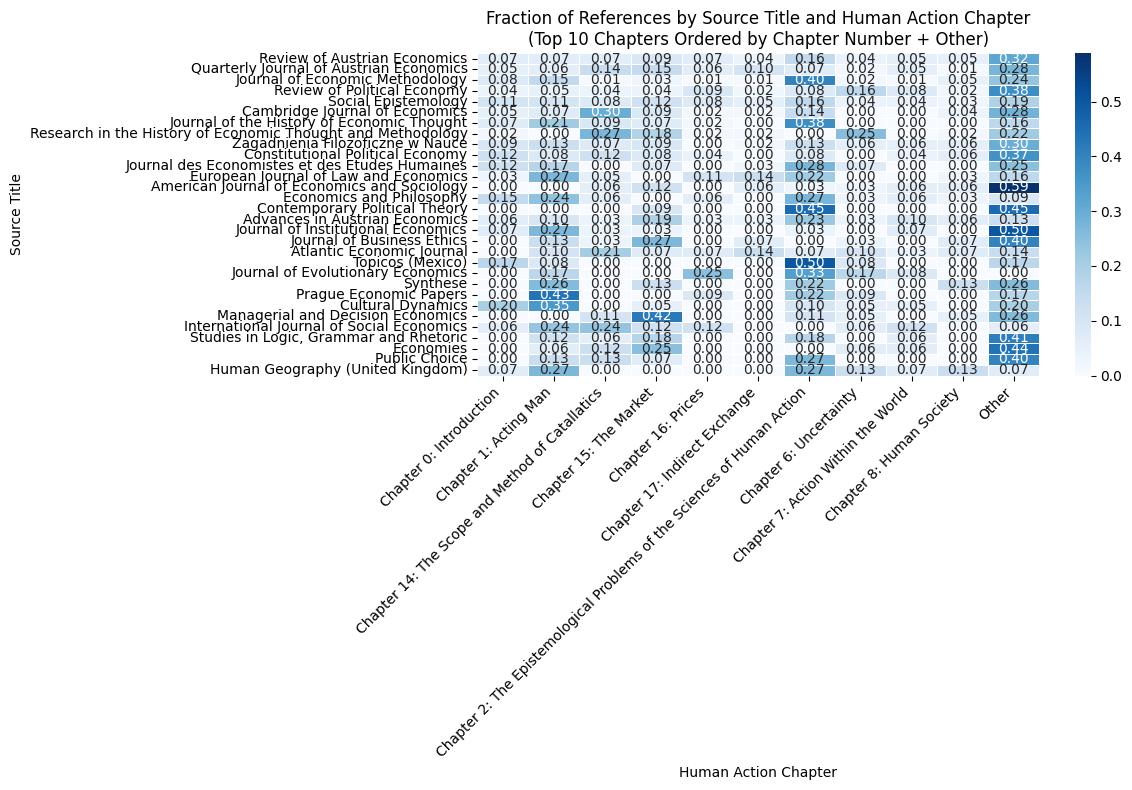

Heatmap saved to ../reports/mises_heatmap_top10_chapters_sorted_by_number.png


In [23]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../reports/"
os.makedirs(output_dir, exist_ok=True)

# Get top Source titles (com page não NA)
top_sources = (
    mises_citations_df.loc[mises_citations_df['page'].notna(), 'source title']
    .value_counts()
    .head(30)
    .index
)

filtered_df = mises_citations_df[
    mises_citations_df['source title'].isin(top_sources) &
    mises_citations_df['page'].notna()
]

# ----------------------------------------
# Top 10 chapters (by frequency)
# ----------------------------------------
top_chapters = (
    filtered_df['human_action_chapter_name']
    .value_counts()
    .head(10)
    .index
)

filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(
    filtered_df['human_action_chapter_name'].isin(top_chapters),
    other="Other"
)

# ----------------------------------------
# Build chapter → chapter_number map
# ----------------------------------------
chapter_number_map = (
    filtered_df.loc[
        filtered_df['chapter_grouped'] != "Other",
        ['human_action_chapter_name', 'human_action_chapter_number']
    ]
    .drop_duplicates()
    .set_index('human_action_chapter_name')['human_action_chapter_number']
    .to_dict()
)

# ----------------------------------------
# Crosstab (frações por Source title)
# ----------------------------------------
count_table = pd.crosstab(
    filtered_df['source title'],
    filtered_df['chapter_grouped'],
    normalize='index'
)

# Reorder rows (Source title)
ordered_index = (
    filtered_df['source title']
    .value_counts()
    .loc[top_sources]
    .index
)
count_table = count_table.loc[ordered_index]

# ----------------------------------------
# Sort columns by chapter_number, keep "Other" last
# ----------------------------------------
sorted_chapters = sorted(
    [c for c in count_table.columns if c != "Other"],
    key=lambda c: chapter_number_map.get(c, float('inf'))
)

if "Other" in count_table.columns:
    sorted_chapters.append("Other")

count_table = count_table[sorted_chapters]

# ----------------------------------------
# Plot heatmap
# ----------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(
    count_table,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)

plt.title(
    "Fraction of References by Source Title and Human Action Chapter\n"
    "(Top 10 Chapters Ordered by Chapter Number + Other)"
)
plt.xlabel("Human Action Chapter")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
output_path = os.path.join(
    output_dir,
    "mises_heatmap_top10_chapters_sorted_by_number.png"
)
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


In [24]:
'''
prompt:
_ é um pandas df com pares (paper_id, human_action_chapter_number). 
Gere código que gera uma matriz em que cada linha é um paper_id e cada coluna conta quantas ocorrências de human_action_chapter_number existem para este paper_id.
'''

import pandas as pd

# Supondo que mises_res_fd já esteja definido como um DataFrame com colunas:
# 'paper_id' e 'human_action_chapter_number'

# Cria a matriz de contagem (cada linha é um paper_id, cada coluna um capítulo, com as contagens)
chapter_matrix = pd.crosstab(
    index=mises_citations_df['paper_id'],
    columns=mises_citations_df['human_action_chapter_number']
)

# Renomeia as colunas para deixar claro que são capítulos
chapter_matrix.columns = [f'chapter_{col}' for col in chapter_matrix.columns]

chapter_matrix.shape



(1841, 41)

C:\Users\pedro\AppData\Local\Temp\ipykernel_16776\1014379415.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(


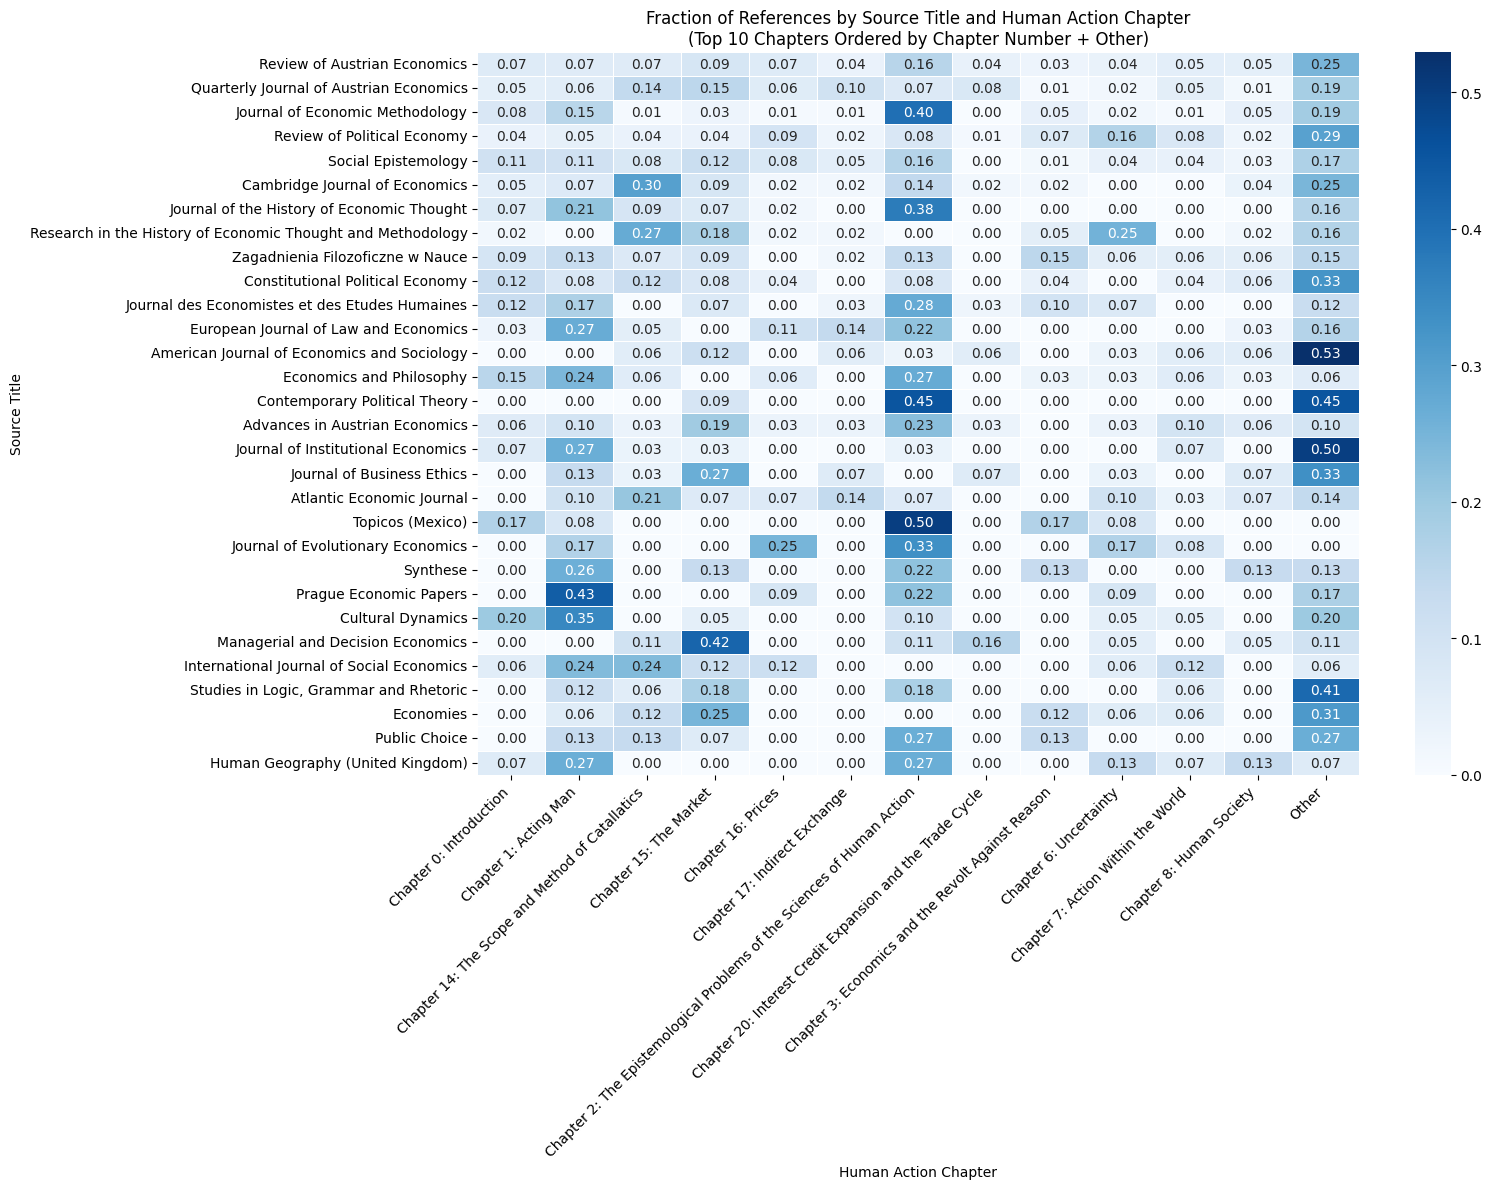

Heatmap saved to ../reports/mises_heatmap_top10_chapters_sorted_by_number.png


In [25]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../reports/"
os.makedirs(output_dir, exist_ok=True)

# Get top Source titles (com page não NA)
top_sources = (
    mises_citations_df.loc[mises_citations_df['page'].notna(), 'source title']
    .value_counts()
    .head(30)
    .index
)

filtered_df = mises_citations_df[
    mises_citations_df['source title'].isin(top_sources) &
    mises_citations_df['page'].notna()
]

# ----------------------------------------
# Top 10 chapters (by frequency)
# ----------------------------------------
top_chapters = (
    filtered_df['human_action_chapter_name']
    .value_counts()
    .head(12)
    .index
)

filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(
    filtered_df['human_action_chapter_name'].isin(top_chapters),
    other="Other"
)

# ----------------------------------------
# Build chapter → chapter_number map
# ----------------------------------------
chapter_number_map = (
    filtered_df.loc[
        filtered_df['chapter_grouped'] != "Other",
        ['human_action_chapter_name', 'human_action_chapter_number']
    ]
    .drop_duplicates()
    .set_index('human_action_chapter_name')['human_action_chapter_number']
    .to_dict()
)

# ----------------------------------------
# Crosstab (frações por Source title)
# ----------------------------------------
count_table = pd.crosstab(
    filtered_df['source title'],
    filtered_df['chapter_grouped'],
    normalize='index'
)

# Reorder rows (Source title)
ordered_index = (
    filtered_df['source title']
    .value_counts()
    .loc[top_sources]
    .index
)
count_table = count_table.loc[ordered_index]

# ----------------------------------------
# Sort columns by chapter_number, keep "Other" last
# ----------------------------------------
sorted_chapters = sorted(
    [c for c in count_table.columns if c != "Other"],
    key=lambda c: chapter_number_map.get(c, float('inf'))
)

if "Other" in count_table.columns:
    sorted_chapters.append("Other")

count_table = count_table[sorted_chapters]

# ----------------------------------------
# Plot heatmap
# ----------------------------------------
plt.figure(figsize=(16, 12))
sns.heatmap(
    count_table,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)

plt.title(
    "Fraction of References by Source Title and Human Action Chapter\n"
    "(Top 10 Chapters Ordered by Chapter Number + Other)"
)
plt.xlabel("Human Action Chapter")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
output_path = os.path.join(
    output_dir,
    "mises_heatmap_top10_chapters_sorted_by_number.png"
)
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


In [26]:
import pandas as pd 

mises_citation_pair_df = pd.read_csv("../data/processed/mises_citation_pairs.csv")

mises_citation_pair_df.head()

,Unnamed: 0,paper_id,sentence_id_1,sentence_id_2,raw_1,raw_2,human_action_part_number_1,human_action_part_number_2,distance
0,0,1,_szF6vj8,_Smuna6E,"Mises (1966Mises ( [1949]], p. 405)",Mises (1976Mises ( [1933] ] ),4,WHOLE,144
1,1,17,_mNsJv6A,_rJunZYM,"Mises (1998, p. 144)","(Mises, 1998, p. 301)",2,4,91
2,2,17,_mNsJv6A,_PY3B9nz,"Mises (1998, p. 144)","(Mises, 1998, p. 302)",2,4,95
3,3,17,_mNsJv6A,_GeRembv,"Mises (1998, p. 144)","(Mises, 1951)",2,WHOLE,167
4,4,17,_mNsJv6A,_2tvVbYR,"Mises (1998, p. 144)","(Mises, 2008)",2,WHOLE,61


In [27]:
import pandas as pd
from itertools import combinations

# =========================
# 1️⃣ Filtragem básica
# =========================

required_cols = [
    "paper_id",
    "sentence_id",
    "raw",
    "human_action_part_number",
    "sentence_seq_number"
]

df = (
    mises_citations_df
    .dropna(subset=required_cols)
    .copy()
)

# =========================
# 2️⃣ Geração dos pares por paper_id
# =========================

rows = []

for paper_id, group in df.groupby("paper_id"):
    if len(group) < 2:
        continue

    for (_, r1), (_, r2) in combinations(group.iterrows(), 2):
        rows.append({
            "paper_id": paper_id,
            "sentence_id_1": r1["sentence_id"],
            "sentence_id_2": r2["sentence_id"],
            "raw_1": r1["raw"],
            "raw_2": r2["raw"],
            "human_action_part_number_1": r1["human_action_part_number"],
            "human_action_part_number_2": r2["human_action_part_number"],
            "distance": abs(
                r1["sentence_seq_number"] - r2["sentence_seq_number"]
            )
        })

mises_ref_pair_df = pd.DataFrame(rows)

# =========================
# 3️⃣ Normalização dos pares de partes
# =========================

mises_ref_pair_df["part_a"] = mises_ref_pair_df[
    ["human_action_part_number_1", "human_action_part_number_2"]
].min(axis=1)

mises_ref_pair_df["part_b"] = mises_ref_pair_df[
    ["human_action_part_number_1", "human_action_part_number_2"]
].max(axis=1)

# =========================
# 4️⃣ Estatísticas de distância por par
# =========================

pair_distance_stats = (
    mises_ref_pair_df
    .groupby(["part_a", "part_b"])
    .agg(
        mean_distance=("distance", "mean"),
        median_distance=("distance", "median"),
        p10_distance=("distance", lambda x: x.quantile(0.10)),
        std_distance=("distance", "std"),
        n_pairs=("distance", "count")
    )
    .reset_index()
    .sort_values("mean_distance", ascending=False)
)

# =========================
# 5️⃣ (Opcional) Limpezas analíticas
# =========================

# Remove pares da mesma parte (ex: 3–3)
pair_distance_stats = pair_distance_stats[
    pair_distance_stats["part_a"] != pair_distance_stats["part_b"]
]

# Impõe tamanho mínimo de amostra
MIN_PAIRS = 20
pair_distance_stats = pair_distance_stats[
    pair_distance_stats["n_pairs"] >= MIN_PAIRS
]

pair_distance_stats.sort_values(by='p10_distance')


,part_a,part_b,mean_distance,median_distance,p10_distance,std_distance,n_pairs
28,3,7,127.950000,131.0,4.0,99.963827,40
26,3,5,85.793103,76.0,6.4,69.609880,58
29,3,WHOLE,123.255319,68.0,7.6,180.315842,517
38,5,WHOLE,110.965986,64.0,8.0,109.160960,147
31,4,5,113.771739,98.0,8.6,83.883813,184
25,3,4,124.564169,92.0,9.0,123.709182,1161
40,6,7,94.610169,30.0,10.8,132.886394,59
3,0,3,168.087097,156.5,10.9,158.007974,310
36,5,6,75.913043,78.5,11.0,54.261845,46
34,4,WHOLE,146.308995,89.0,11.0,287.693397,4369
